In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Loan_prediction=pd.read_csv("loan_data.csv")

In [3]:
print("Dataset Length:",len(Loan_prediction))

Dataset Length: 9578


In [4]:
Loan_prediction.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
Loan_prediction.shape

(9578, 14)

In [6]:
Loan_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
Loan_prediction.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Text(0.5, 0, 'FICO')

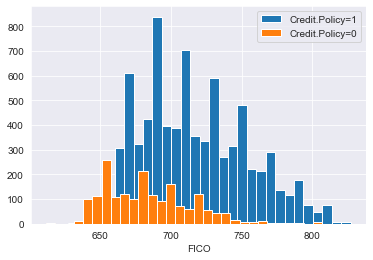

In [8]:
sns.set_style('darkgrid')
plt.hist(Loan_prediction['fico'].loc[Loan_prediction['credit.policy']==1], bins=30, label='Credit.Policy=1')
plt.hist(Loan_prediction['fico'].loc[Loan_prediction['credit.policy']==0], bins=30, label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

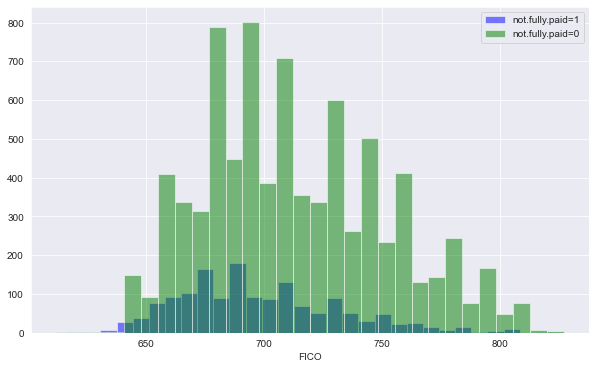

In [9]:
plt.figure(figsize=(10,6))
Loan_prediction[Loan_prediction['not.fully.paid']==1]['fico'].hist(bins=30, alpha=0.5, color='blue', label='not.fully.paid=1')
Loan_prediction[Loan_prediction['not.fully.paid']==0]['fico'].hist(bins=30, alpha=0.5, color='green', label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

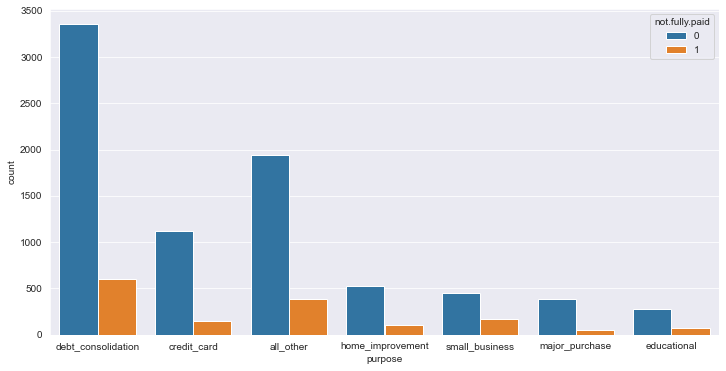

In [10]:
#creating a countplot to see the counts of purpose of loans by not fully.paid
plt.figure(figsize=(12,6))
sns.countplot(data=Loan_prediction, x='purpose', hue='not.fully.paid')

<Figure size 864x576 with 0 Axes>

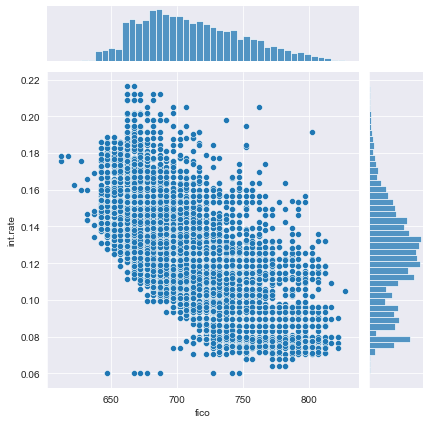

In [11]:
#checking the trend between FICO and the interest rate
plt.figure(figsize=(12,8))
sns.jointplot(x='fico', y='int.rate', data=Loan_prediction)

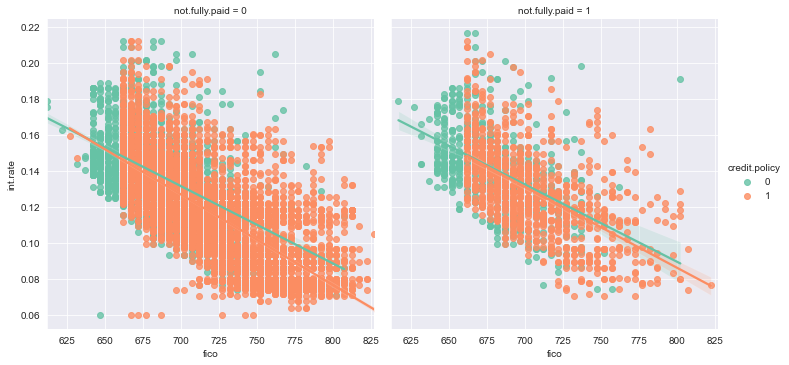

In [13]:
#understanding the relationship between credit.policy and not.fully.paid
sns.lmplot(data=Loan_prediction, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', palette='Set2')

In [17]:
Loan_prediction.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [19]:
#handling categorical variable purpose
purpose_c = pd.get_dummies(Loan_prediction['purpose'], drop_first=True)
loans_f = pd.concat([Loan_prediction, purpose_c], axis=1).drop('purpose', axis=1)
loans_f.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


<AxesSubplot:>

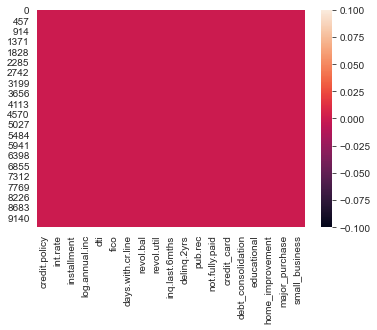

In [21]:
#checking for null values
sns.heatmap(loans_f.isnull())

In [23]:
#Splitting the dataset into test and train set
from sklearn.model_selection import train_test_split
x=loans_f.values[:,1:18]
y=loans_f.values[:,0]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [38]:
#using decision tree
from sklearn.tree import DecisionTreeClassifier
clf_entropy = DecisionTreeClassifier(criterion="entropy",random_state=40,
 max_depth=3,min_samples_leaf=5)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=40)

In [43]:
y_pred=clf_entropy.predict(x_test)
print(y_pred)

[1. 0. 1. ... 1. 1. 1.]


In [46]:
from sklearn.metrics import accuracy_score

print("Accuracy is ",accuracy_score(y_pred,y_test)*100)

Accuracy is  96.69450243562979
